In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Load data
serp_data = pd.read_csv('serp_data.csv')
serp_data.head()


,date,keyword,rank,meta_description,featured_snippet
0,2023-01-01,seo tips,1,poyzmngdclneelvoegnolggcjanpwfrqrvbjbekyvhtnbe...,NaN
1,2023-01-01,seo tips,2,rxoriiksgoofymruwkhoqgyirrbquagtlhqaoylenntvqk...,NaN
2,2023-01-01,seo tips,3,ryouzhihrdmayhbgazjzgqnlophdftjncoxijdwksnskrx...,NaN
3,2023-01-01,seo tips,4,sqzsaalsohsxkmmrbitepeceaojxnyfctkfgjyxbhdkqzc...,NaN
4,2023-01-01,seo tips,5,qnobgnwefhftszuavjlxvvddovbneaieflltujgatloiqf...,NaN


In [36]:
# Preprocessing

# Fill missing values in featured_snippet with an empty string
serp_data['featured_snippet'] = serp_data['featured_snippet'].fillna('')

In [37]:
serp_data['featured_snippet'].head()

0    
1    
2    
3    
4    
Name: featured_snippet, dtype: object

In [38]:
# Combine meta_description and featured_snippet into one text feature
serp_data['combined_text'] = serp_data['meta_description'] + ' ' + serp_data['featured_snippet']
serp_data['combined_text'].head()

0    poyzmngdclneelvoegnolggcjanpwfrqrvbjbekyvhtnbe...
1    rxoriiksgoofymruwkhoqgyirrbquagtlhqaoylenntvqk...
2    ryouzhihrdmayhbgazjzgqnlophdftjncoxijdwksnskrx...
3    sqzsaalsohsxkmmrbitepeceaojxnyfctkfgjyxbhdkqzc...
4    qnobgnwefhftszuavjlxvvddovbneaieflltujgatloiqf...
Name: combined_text, dtype: object

In [39]:
serp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1200 non-null   object
 1   keyword           1200 non-null   object
 2   rank              1200 non-null   int64 
 3   meta_description  1200 non-null   object
 4   featured_snippet  1200 non-null   object
 5   combined_text     1200 non-null   object
dtypes: int64(1), object(5)
memory usage: 56.4+ KB


In [40]:
#convert data to datetime
# Convert date to datetime and extract year, month, day
serp_data['date'] = pd.to_datetime(serp_data['date'])
serp_data['year'] = serp_data['date'].dt.year
serp_data['month'] = serp_data['date'].dt.month
serp_data['day'] = serp_data['date'].dt.day


In [41]:
# Encode the keyword column
label_encoder = LabelEncoder()
serp_data['keyword_encoded'] = label_encoder.fit_transform(serp_data['keyword'])

In [42]:
# Feature Engineering: Text features using TF-IDF
tfidf = TfidfVectorizer(max_features=100)  # Limiting to 100 features for simplicity
tfidf_features = tfidf.fit_transform(serp_data['combined_text']).toarray()
tfidf_feature_names = tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_features, columns=tfidf_feature_names)

In [43]:
# Combine TF-IDF features with other features
model_data = pd.concat([serp_data[['rank', 'keyword_encoded', 'year', 'month', 'day']], tfidf_df], axis=1)

# Splitting data into features (X) and target (y)
X = model_data.drop('rank', axis=1)
y = model_data['rank']

In [44]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

mse

10.932690200502133

In [45]:
# Model Training with Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Model Evaluation
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)

mse_gb

8.398858576718712

In [46]:
#test model with test_data.csv
test_data = pd.read_csv('test_data.csv')
test_data.head()


,date,keyword,rank,meta_description,featured_snippet
0,2023-04-01,seo tips,1,daHy9w40DOYMwGslcubVtuQ62dIDvrMbgUj5881iJ397Ir...,ygQdvhHlsSAaGjlTYGCAsi7qEmxR9GppY60GxbJf8YfJCc...
1,2023-04-01,seo tips,2,MMFxEdObWOG3zSyhUIltP5m6j0TQiPQzwtoJICFrO8VJnb...,NaN
2,2023-04-01,seo tips,3,FnBTtYgRqIxDOnkfoTk3voRiRCouenZtaWckxHIUpUuqpz...,NaN
3,2023-04-01,seo tips,4,tjzAE25UcSLrykPEzON67pZ4aAXOcvgNqEMLbsGyqsQrs7...,SFiZ2Kbmay5rpmplLHrMWBA78rVvDNJVvjMt4lPd6b8Y19...
4,2023-04-01,seo tips,5,j5UuRRjeWwfDv0LNioYAqzJWFVashATiXxLmp6AkRyyPKP...,NaN


In [47]:

# Preprocessing the test data
# Fill missing values in featured_snippet
test_data['featured_snippet'] = test_data['featured_snippet'].fillna('')

# Combine meta_description and featured_snippet
test_data['combined_text'] = test_data['meta_description'] + ' ' + test_data['featured_snippet']

# Convert date to datetime and extract year, month, day
test_data['date'] = pd.to_datetime(test_data['date'])
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day'] = test_data['date'].dt.day

# Encode the keyword column using the same LabelEncoder from training
test_data['keyword_encoded'] = label_encoder.transform(test_data['keyword'])

# Apply the same TF-IDF transformation as was applied to the training data
tfidf_test_features = tfidf.transform(test_data['combined_text']).toarray()
tfidf_test_df = pd.DataFrame(tfidf_test_features, columns=tfidf.get_feature_names_out())

In [48]:
# Combine the transformed features for the test set
X_test = pd.concat([test_data[['keyword_encoded', 'year', 'month', 'day']], tfidf_test_df], axis=1)

In [49]:
# Predict using the Gradient Boosting Regressor model
y_pred = gb_model.predict(X_test)

# Adding predictions to the test dataframe for easy viewing
test_data['predicted_rank'] = y_pred

# Displaying the first few rows of the test data with predictions
test_data.head()


,date,keyword,rank,meta_description,featured_snippet,combined_text,year,month,day,keyword_encoded,predicted_rank
0,2023-04-01,seo tips,1,daHy9w40DOYMwGslcubVtuQ62dIDvrMbgUj5881iJ397Ir...,ygQdvhHlsSAaGjlTYGCAsi7qEmxR9GppY60GxbJf8YfJCc...,daHy9w40DOYMwGslcubVtuQ62dIDvrMbgUj5881iJ397Ir...,2023,4,1,2,5.460821
1,2023-04-01,seo tips,2,MMFxEdObWOG3zSyhUIltP5m6j0TQiPQzwtoJICFrO8VJnb...,,MMFxEdObWOG3zSyhUIltP5m6j0TQiPQzwtoJICFrO8VJnb...,2023,4,1,2,5.460821
2,2023-04-01,seo tips,3,FnBTtYgRqIxDOnkfoTk3voRiRCouenZtaWckxHIUpUuqpz...,,FnBTtYgRqIxDOnkfoTk3voRiRCouenZtaWckxHIUpUuqpz...,2023,4,1,2,5.460821
3,2023-04-01,seo tips,4,tjzAE25UcSLrykPEzON67pZ4aAXOcvgNqEMLbsGyqsQrs7...,SFiZ2Kbmay5rpmplLHrMWBA78rVvDNJVvjMt4lPd6b8Y19...,tjzAE25UcSLrykPEzON67pZ4aAXOcvgNqEMLbsGyqsQrs7...,2023,4,1,2,5.460821
4,2023-04-01,seo tips,5,j5UuRRjeWwfDv0LNioYAqzJWFVashATiXxLmp6AkRyyPKP...,,j5UuRRjeWwfDv0LNioYAqzJWFVashATiXxLmp6AkRyyPKP...,2023,4,1,2,5.460821


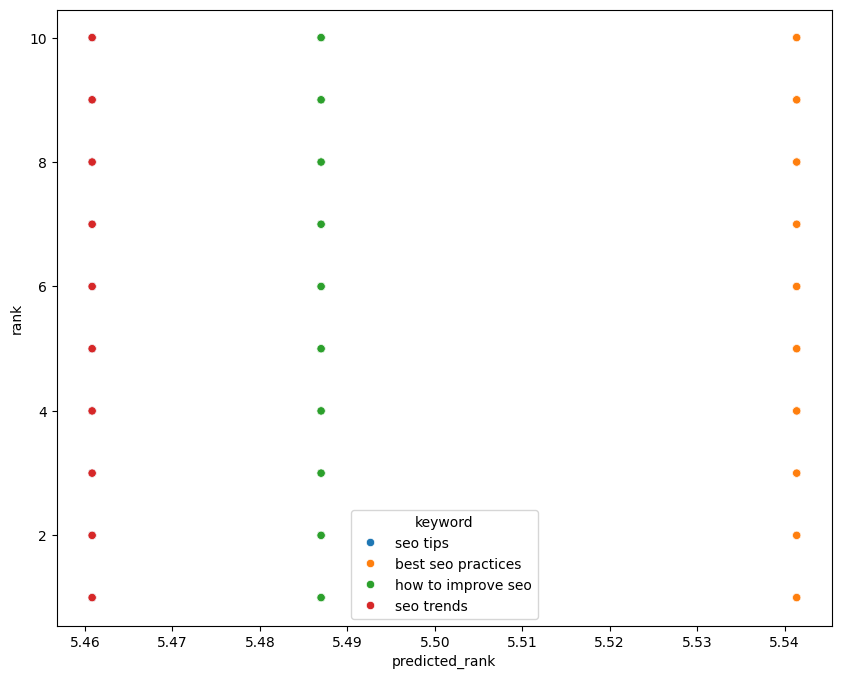

In [51]:
#visualize the predictions
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the predicted rank vs actual rank with different colors for each keyword
plt.figure(figsize=(10, 8))
sns.scatterplot(data=test_data, x='predicted_rank', y='rank', hue='keyword')
plt.show()

Key observations from the plot :

### The predicted ranks seem to cluster around certain values on the x-axis for each keyword. This suggests that the model may have some level of accuracy but potentially a limited range in its predictions.
### There appears to be a vertical dispersion of points for each predicted rank value, indicating that for the same predicted rank, the actual ranks vary significantly.
### If the model were perfect, all points would lie on a diagonal line where the actual rank equals the predicted rank. The spread of points away from such a line suggests prediction errors.
### The predictions for 'seo tips' and 'how to improve seo' (blue and green points) seem to be more closely grouped, while the predictions for 'best seo practices' and 'seo trends' (red and orange points) are more spread out, suggesting that the model's performance may vary by keyword.
### The model might be systematically underpredicting or overpredicting ranks for certain keywords, indicated by the points not being evenly distributed around a line that would represent a perfect prediction.
## This plot can be used to evaluate the performance of the machine learning model, indicating where it makes accurate predictions and where it might need improvement. It also provides insights into whether the model's performance is consistent across different keywords.





